In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [10]:
# Get all the columns of Measurement
from sqlalchemy import inspect
inspector=inspect(engine)
columns=inspector.get_columns("Measurement")
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [42]:
# Get all the columns of Station
columns2=inspector.get_columns("Station")
columns2

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [11]:
# Get the last date
last_date=session.query(func.max(Measurement.date)).all()
last_date

[('2017-08-23')]

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
precipitation=session.query(Measurement.date,Measurement.prcp).\
                filter(Measurement.date>='2016-08-23').\
                filter(Measurement.date<='2017-08-23').all()
precipitation[0:10]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0)]

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df=pd.DataFrame(precipitation,columns=["date","precipitation"])
precipitation_df.set_index("date",inplace=True)
precipitation_df.head(10)

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [14]:
# Sort the dataframe by date
precipitation_df=precipitation_df.sort_values(by="date")
precipitation_df.head(10)

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


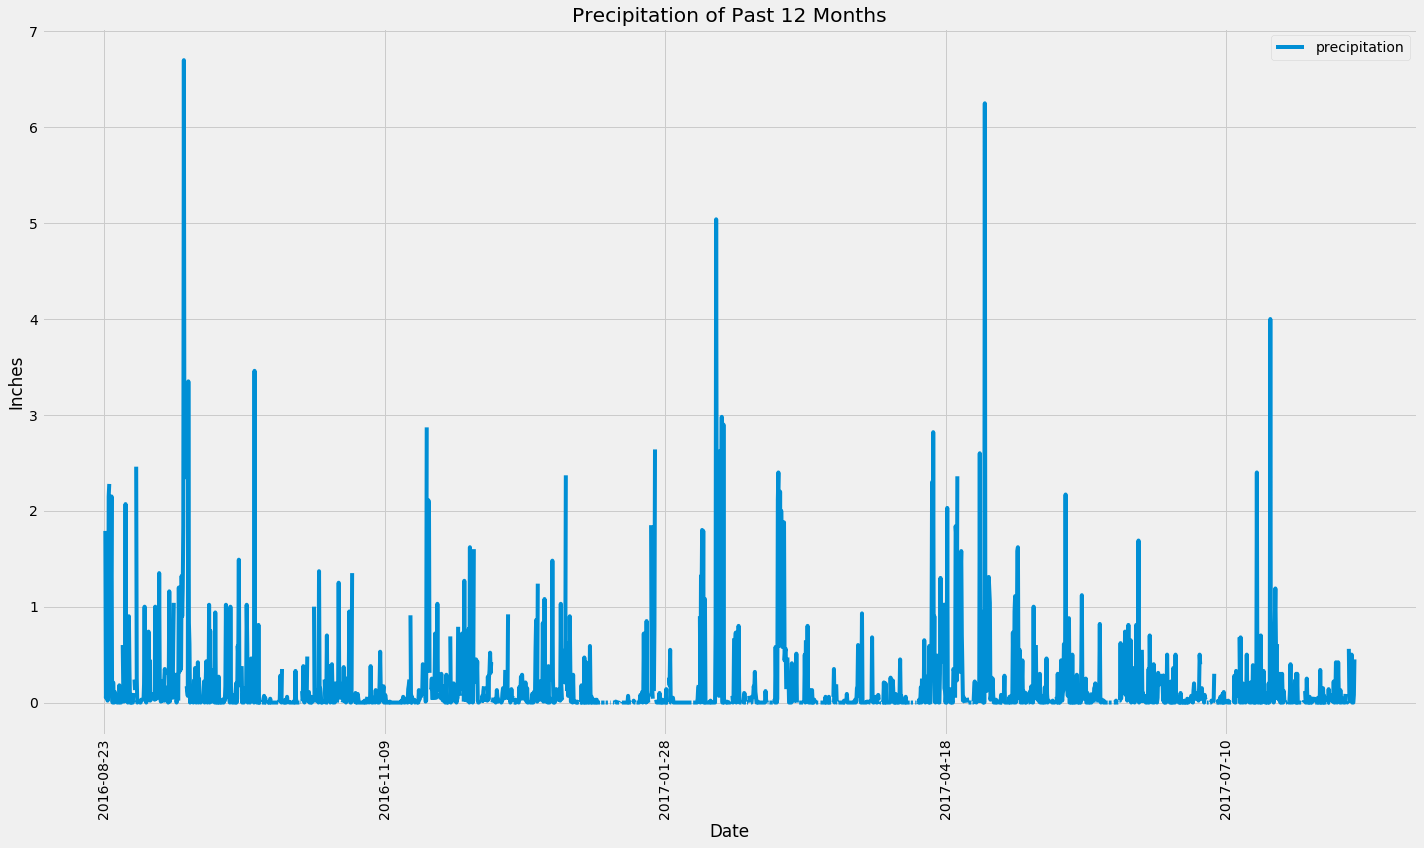

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
fig1,ax1=plt.subplots(figsize=(20,12))
precipitation_df.plot(ax=ax1,grid=True,rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation of Past 12 Months")
plt.tight_layout()
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df["precipitation"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

In [17]:
# Design a query to show how many stations are available in this dataset?
from sqlalchemy import distinct
number_of_stations=session.query(distinct(Station.id)).count()
number_of_stations

9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_rows=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_rows

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

### USC00519281 has the highest number of rows.

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp=session.query(func.min(Measurement.tobs)).filter(Measurement.station=="USC00519281").first()
highest_temp=session.query(func.max(Measurement.tobs)).filter(Measurement.station=="USC00519281").first()
average_temp=session.query(func.avg(Measurement.tobs)).filter(Measurement.station=="USC00519281").first()
print(f"The lowest temperature of station USC00519281 is {lowest_temp[0]}.")
print(f"The highest temperature of station USC00519281 is {highest_temp[0]}.")
print(f"The average temperature of station USC00519281 is {average_temp[0]}.")

The lowest temperature of station USC00519281 is 54.0.
The highest temperature of station USC00519281 is 85.0.
The average temperature of station USC00519281 is 71.66378066378067.


In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures=session.query(Measurement.date,Measurement.tobs).\
                filter(Measurement.station=="USC00519281").\
                filter(Measurement.date>='2016-08-23').\
                filter(Measurement.date<='2017-08-23').all()
tobs_df=pd.DataFrame(temperatures,columns=["date","temperatures"])
tobs_df.head()

,date,temperatures
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


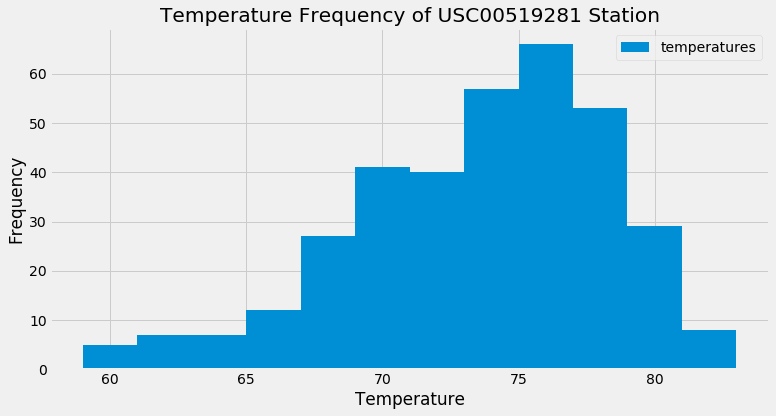

In [21]:
fig2,ax2=plt.subplots(figsize=(11,6))
tobs_df.plot.hist(ax=ax2,bins=12,grid=True)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Frequency of USC00519281 Station")
plt.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [38]:
# Temperature Analysis I
# Filter temperatures of June
june_temp=session.query(Measurement.tobs).filter(func.strftime("%m",Measurement.date)=="06").all()

# Filter temperatures of December
december_temp=session.query(Measurement.tobs).filter(func.strftime("%m",Measurement.date)=="12").all()

# Run a t-test with the null hypothesis that temperatures of June and December are the same.
from scipy import stats
stats.ttest_ind(june_temp,december_temp)

Ttest_indResult(statistic=array([31.60372399]), pvalue=array([3.9025129e-191]))

### Since the p-value of the t-test is less than 0.05, the null hypothesis will be rejected, which infers that the June temperatures of Hawaii are significantly different from December temperatures.

In [22]:
# Temperature Analysis II
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# I choose to start my trip on 08-01 and end my trip on 08-09.
trip_temp=calc_temps("2017-08-01","2017-08-09")
trip_temp

[(71.0, 79.0, 83.0)]

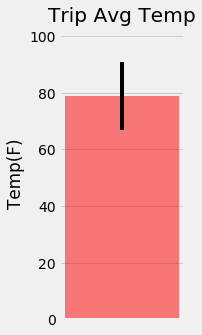

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
min_temp=trip_temp[0][0]
average_temp=trip_temp[0][1]
max_temp=trip_temp[0][2]
ptp=max_temp-min_temp
plt.figure(figsize=(2,5))
plt.bar(0.2,average_temp,yerr=ptp,width=0.3,color="red",alpha=0.5)
plt.title("Trip Avg Temp")
plt.ylabel("Temp(F)")
plt.ylim(0,max_temp+20)
plt.xticks([])
plt.show()

In [44]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date="2017-08-01"
end_date="2017-08-09"
prcp_station=session.query(Station.station,func.sum(Measurement.prcp),Station.name,Station.latitude,Station.longitude,Station.elevation).\
            filter(Measurement.date>=start_date).filter(Measurement.date<=end_date).filter(Measurement.station==Station.station).\
            group_by(Station.station).order_by(func.sum(Measurement.prcp).desc()).all()
for row in prcp_station:
    print(f"Station: {row[0]}")
    print(f"Total amount of rainfall: {row[1]}")
    print(f"Station name: {row[2]}")
    print(f"Station latitude: {round(row[3],4)}")
    print(f"Station longitude: {round(row[4],4)}")
    print(f"Station elevation: {row[5]}")
    print("\n")

Station: USC00516128
Total amount of rainfall: 0.85
Station name: MANOA LYON ARBO 785.2, HI US
Station latitude: 21.3331
Station longitude: -157.8025
Station elevation: 152.4


Station: USC00514830
Total amount of rainfall: 0.32
Station name: KUALOA RANCH HEADQUARTERS 886.9, HI US
Station latitude: 21.5213
Station longitude: -157.8374
Station elevation: 7.0


Station: USC00519281
Total amount of rainfall: 0.06
Station name: WAIHEE 837.5, HI US
Station latitude: 21.4517
Station longitude: -157.8489
Station elevation: 32.9


Station: USC00519397
Total amount of rainfall: 0.04
Station name: WAIKIKI 717.2, HI US
Station latitude: 21.2716
Station longitude: -157.8168
Station elevation: 3.0


Station: USC00519523
Total amount of rainfall: 0.0
Station name: WAIMANALO EXPERIMENTAL FARM, HI US
Station latitude: 21.3356
Station longitude: -157.7114
Station elevation: 19.5




In [45]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [155]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

start_year=2017
start_month=8
start_day=1
duration=9
date_range=[]
date_list=[]
for i in range(duration):
    date_range.append(dt.date(start_year,start_month,start_day+i))
    date_list.append(dt.date(start_year,start_month,start_day+i).strftime("%m-%d"))
normals=[]
for date in date_list:
    normals.append(daily_normals(date)[0])
normals

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0),
 (68.0, 76.5576923076923, 83.0),
 (69.0, 75.98039215686275, 81.0)]

In [160]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_df=pd.DataFrame(normals,columns=["tmin","tavg","tmax"])
trip_df["date"]=date_range
trip_df.set_index("date",inplace=True)
trip_df

,tmin,tavg,tmax
date,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0
2017-08-08,68.0,76.557692,83.0
2017-08-09,69.0,75.980392,81.0


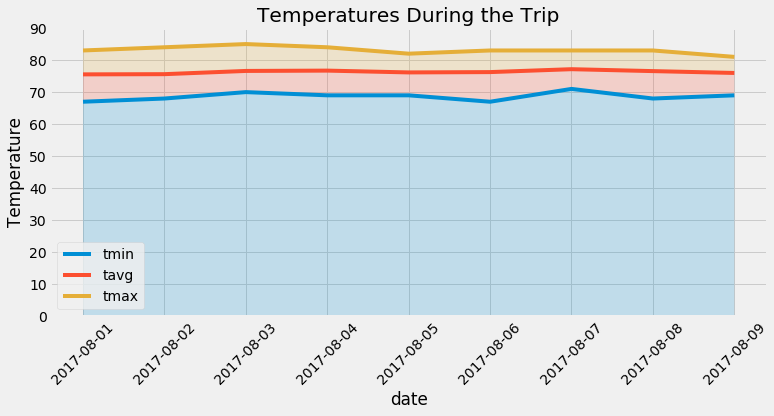

In [189]:
# Plot the daily normals as an area plot with `stacked=False`
x=trip_df.index
fig3,ax3=plt.subplots(figsize=(11,6))
trip_df.plot(ax=ax3,stacked=False,rot=45)
plt.ylabel("Temperature")
plt.title("Temperatures During the Trip")
plt.ylim(0,max(trip_df["tmax"]+5))
ax3.fill_between(x,0,trip_df["tmin"],alpha=0.2)
ax3.fill_between(x,trip_df["tmin"],trip_df["tavg"],alpha=0.2)
ax3.fill_between(x,trip_df["tavg"],trip_df["tmax"],alpha=0.2)
plt.tight_layout()
plt.show()